### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load the dataset

Let's choose last two columns for visualizing purpose

In [7]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,3:].values


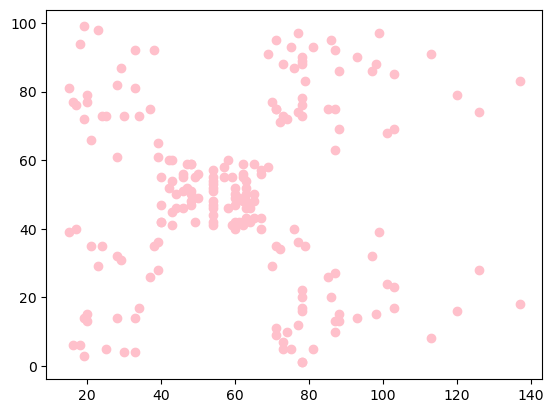

In [17]:
plt.scatter(X[:,0],X[:,1],color = 'pink')

### Find the optimal number of clusters using Elbow method

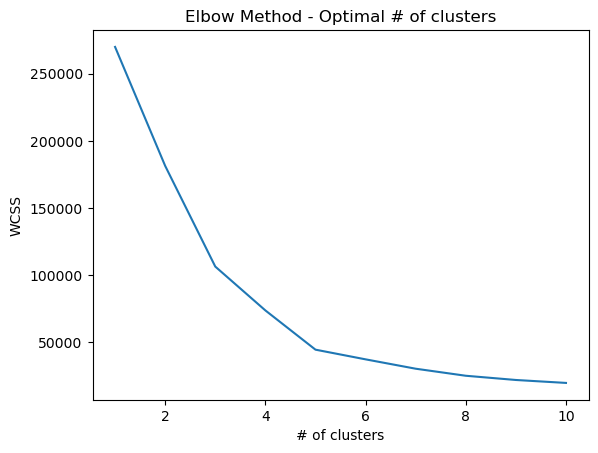

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method - Optimal # of clusters')
plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.show()

### Build the KMeans model using the optimal # of clusters 

In [18]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10,random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [19]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

### Visualize the clusters

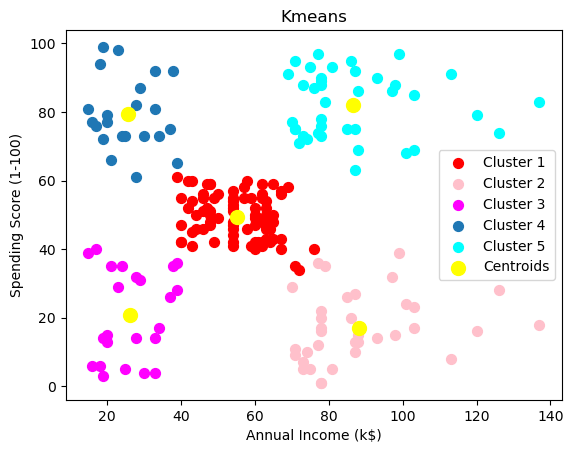

In [32]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s = 50, c = 'pink', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s = 50, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s = 50, label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], s = 50, c = 'cyan', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.title("Kmeans")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [33]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

### Include three features 

In [37]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,1:].values


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer( transformers = [('encoding', OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
print(X)

[[0.0 1.0 19 15 39]
 [0.0 1.0 21 15 81]
 [1.0 0.0 20 16 6]
 [1.0 0.0 23 16 77]
 [1.0 0.0 31 17 40]
 [1.0 0.0 22 17 76]
 [1.0 0.0 35 18 6]
 [1.0 0.0 23 18 94]
 [0.0 1.0 64 19 3]
 [1.0 0.0 30 19 72]
 [0.0 1.0 67 19 14]
 [1.0 0.0 35 19 99]
 [1.0 0.0 58 20 15]
 [1.0 0.0 24 20 77]
 [0.0 1.0 37 20 13]
 [0.0 1.0 22 20 79]
 [1.0 0.0 35 21 35]
 [0.0 1.0 20 21 66]
 [0.0 1.0 52 23 29]
 [1.0 0.0 35 23 98]
 [0.0 1.0 35 24 35]
 [0.0 1.0 25 24 73]
 [1.0 0.0 46 25 5]
 [0.0 1.0 31 25 73]
 [1.0 0.0 54 28 14]
 [0.0 1.0 29 28 82]
 [1.0 0.0 45 28 32]
 [0.0 1.0 35 28 61]
 [1.0 0.0 40 29 31]
 [1.0 0.0 23 29 87]
 [0.0 1.0 60 30 4]
 [1.0 0.0 21 30 73]
 [0.0 1.0 53 33 4]
 [0.0 1.0 18 33 92]
 [1.0 0.0 49 33 14]
 [1.0 0.0 21 33 81]
 [1.0 0.0 42 34 17]
 [1.0 0.0 30 34 73]
 [1.0 0.0 36 37 26]
 [1.0 0.0 20 37 75]
 [1.0 0.0 65 38 35]
 [0.0 1.0 24 38 92]
 [0.0 1.0 48 39 36]
 [1.0 0.0 31 39 61]
 [1.0 0.0 49 39 28]
 [1.0 0.0 24 39 65]
 [1.0 0.0 50 40 55]
 [1.0 0.0 27 40 47]
 [1.0 0.0 29 40 42]
 [1.0 0.0 31 40 42]
 [1.0 

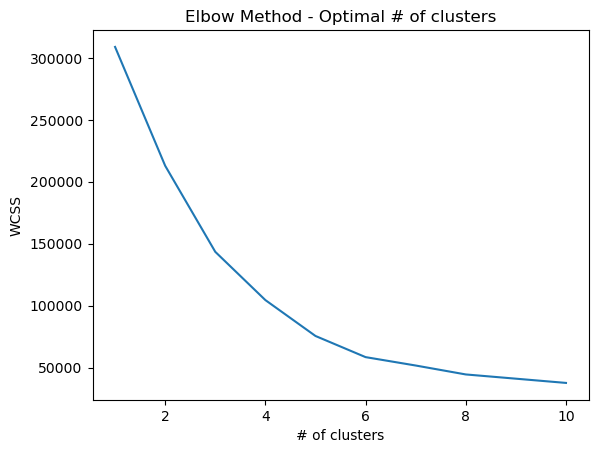

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method - Optimal # of clusters')
plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', n_init = 10,random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [44]:
y_kmeans

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 1, 4,
       5, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)